![Picture title](datacedemy_piezas_wallpaper_desk.png)

# Análisis de los 25 retailers más grandes de Estados Unidos

In [1]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar datos aquí
df = pd.read_csv('/work/largest_us_retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## I. Preguntas del negocio

### 0. ¿Cuál empresa vendió más?

In [3]:
df_sorted = df.sort_values('Sales', ascending=0)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


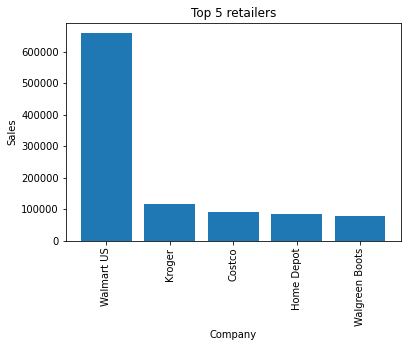

In [4]:
x = df_sorted['Company'][0:5] #Aplicamos slicing como en una lista de Python.
y = df_sorted['Sales'][0:5]

plt.bar(x, y)
plt.title('Top 5 retailers')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

![Picture title](image-20220221-115850.png)

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [5]:
df_sorted['Sales'][1:].mean()

46602.416666666664

El promedio de ventas entre todas las compañías **excluyendo a Walmart como compañía dominante**, corresponde a **$46602 millones USD** aproximadamente.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

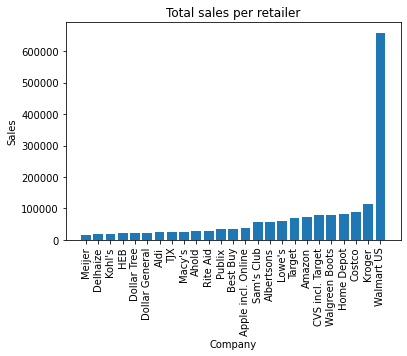

In [6]:
df_sorted_asc = df.sort_values('Sales', ascending=1)
x1 = df_sorted_asc['Company'][:] 
y1 = df_sorted_asc['Sales'][:]

plt.bar(x1, y1)
plt.title('Total sales per retailer')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

In [7]:
y2 = df_sorted_asc['Sales'][:14]
y2

24    16592
23    18201
22    19060
21    21384
20    21464
19    22234
18    24402
17    25012
16    26028
15    26903
14    27486
13    34408
12    34980
11    37664
Name: Sales, dtype: int64

In [8]:
y2.sum()

355818

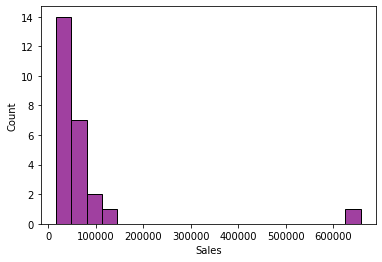

In [9]:
sns.histplot(data = df_sorted_asc, x = "Sales", multiple = "layer", color = "purple")
sns.set(rc = {'figure.figsize':(25,8)})

Podemos ver que **14 compañías** no superan los **50000 millones USD** en ventas 
cuya suma total equivale a **355818 millones USD** como **la mayoría absoluta**, 
otros **9 retailers** no superan la barrera de los **100000 millones USD**, y solamente **2 compañías** tienen ventas por más de esta cantidad.

**Nota: Ver la definición de _mayoría absoluta_ dada por la Real Academia de la Lengua Española en el siguiente link https://dle.rae.es/mayor%C3%ADa**

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

In [10]:
df_stores_no_nan = df[['Company','Stores']].fillna(value=0)
df_stores_asc = df_stores_no_nan.sort_values('Stores', ascending=True)
df_stores_asc

,Company,Stores
6,Amazon,0.0
11,Apple incl. Online,0.0
24,Meijer,231.0
21,HEB,323.0
2,Costco,495.0
10,Sam's Club,655.0
15,Ahold,794.0
16,Macy's,889.0
22,Kohl's,1169.0
23,Delhaize,1280.0


In [11]:
_deepnote_run_altair(df_stores_asc, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Company","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Stores","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [12]:
y3 = df_stores_asc['Stores'][:15]
y3

6        0.0
11       0.0
24     231.0
21     323.0
2      495.0
10     655.0
15     794.0
16     889.0
22    1169.0
23    1280.0
13    1351.0
12    1389.0
7     1772.0
8     1828.0
3     1965.0
Name: Stores, dtype: float64

In [13]:
y3.sum()

14141.0

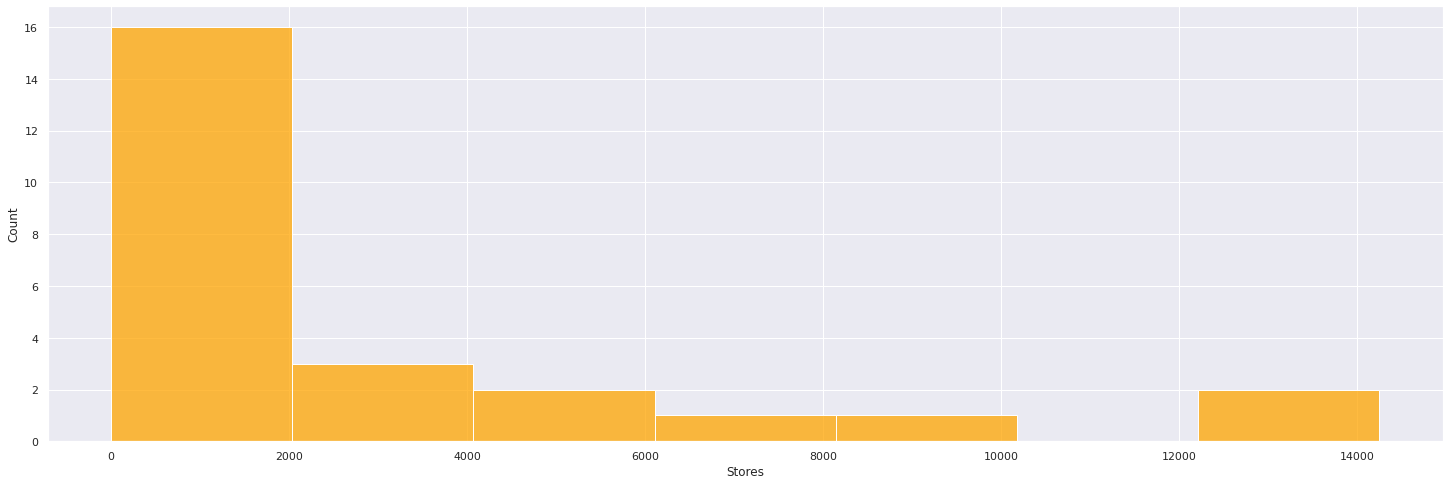

In [14]:
sns.histplot(data = df_stores_asc, x="Stores", multiple="layer", color = "orange")
sns.set(rc = {'figure.figsize':(25,8)})

Podemos concluir que **15 compañías (incluyendo Amazon y Apple) como mayoría absoluta no superan la cantidad de 2000 tiendas físicas**, y entre estos retailers suman un total de **14141 tiendas físicas en USA**.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

In [15]:
df_sales_stores_not_nan = df[['Company', 'Sales', 'Stores', 'Sales/Avg. Store']].fillna(value=0)
df_sales_stores_not_nan

,Company,Sales,Stores,Sales/Avg. Store
0,Walmart US,658119,4574.0,65.649725
1,Kroger,115037,3931.0,30.031850
2,Costco,90048,495.0,187.795620
3,Home Depot,83976,1965.0,42.735878
4,Walgreen Boots,78924,8002.0,9.810927
5,CVS incl. Target,77792,9813.0,8.825959
6,Amazon,71687,0.0,0.000000
7,Target,71208,1772.0,39.982033
8,Lowe's,60311,1828.0,33.311792
9,Albertsons,56829,2326.0,23.877731


<AxesSubplot:xlabel='Stores', ylabel='Sales'>

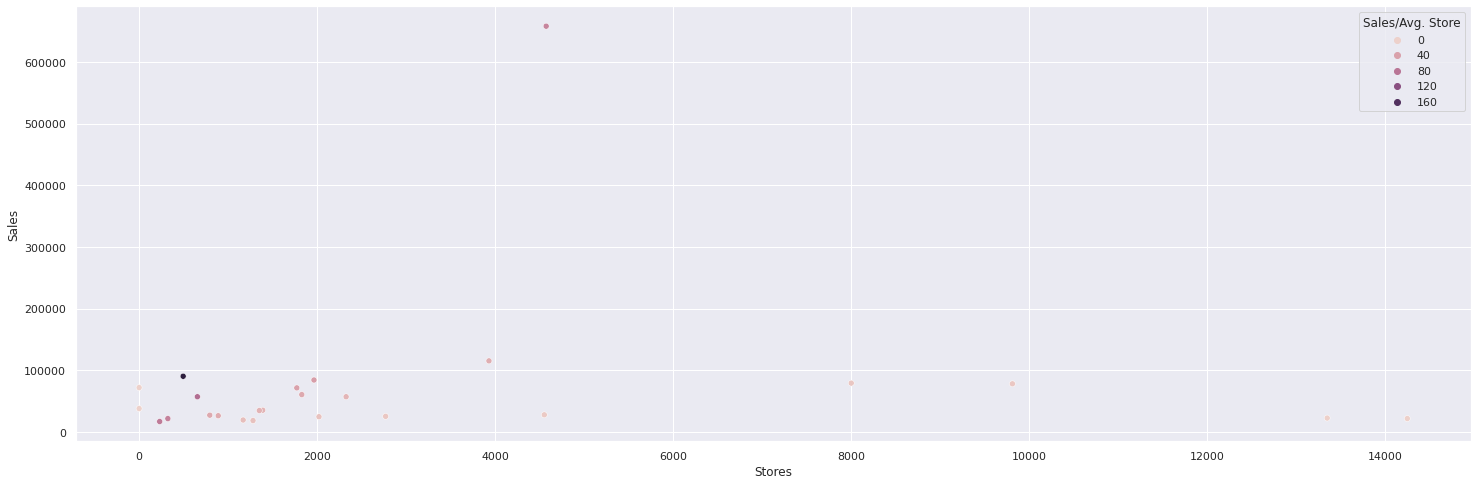

In [16]:
sns.scatterplot(data = df_sales_stores_not_nan, x = 'Stores', y = 'Sales', hue = 'Sales/Avg. Store')

Como podemos ver en el gráfico anterior, **no existe una correlación que nos permita afirmar con total certeza que a mayor cantidad de tiendas, las compañías tendrán mayor cantidad de ventas**, ya que los datos se encuentran demasiado dispersos y **no es posible identificar una tendencia creciente o una asociación lineal perfecta positiva**.

In [17]:
df_sales_stores_not_nan[['Stores', 'Sales']].cov()

,Stores,Sales
Stores,1.587321e+07,3.538255e+07
Sales,3.538255e+07,1.572660e+10


In [18]:
correlation_coefficient = df_sales_stores_not_nan[['Stores', 'Sales']].cov() / (df_sales_stores_not_nan['Stores'].std() * df_sales_stores_not_nan['Sales'].std())
correlation_coefficient

,Stores,Sales
Stores,0.031770,0.070817
Sales,0.070817,31.476392


Fuentes:

https://platzi.com/tutoriales/1269-probabilidad-estadistica/2308-coeficiente-de-correlacion-que-es-y-para-que-sirve/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html

### 5. ¿Cuál es el rango que existe entre las ventas?

In [19]:
salesMaxValue = df_sorted['Sales'].max()
salesMinValue = df_sorted['Sales'].min()
salesRange = salesMaxValue - salesMinValue
salesRange

641527

El rango de las ventas está definido como la diferencia entre el valor máximo y el valor mínimo, por lo tanto, tiene un valor de **$641527 millones USD**

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [20]:
df_sorted_by_stores = df.sort_values('Stores', ascending=0)
df_sorted_by_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
14,Rite Aid,27486,4553.0,6.025649,-0.003720,Drug Stores
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
17,TJX,25012,2770.0,9.369545,0.078241,Apparel
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery


In [21]:
z = df_sorted_by_stores['Stores'][0:5]
w = df_sorted_by_stores['Company'][0:5]

isInBigSales = w.isin(x) #valida si las compañías con más tiendas están entre las que tienen más ventas (PREGUNTA CERO)
isInBigSales #muestra las compañías por ID

20    False
19    False
5     False
4      True
0      True
Name: Company, dtype: bool

In [22]:
w[isInBigSales]

4    Walgreen Boots
0        Walmart US
Name: Company, dtype: object

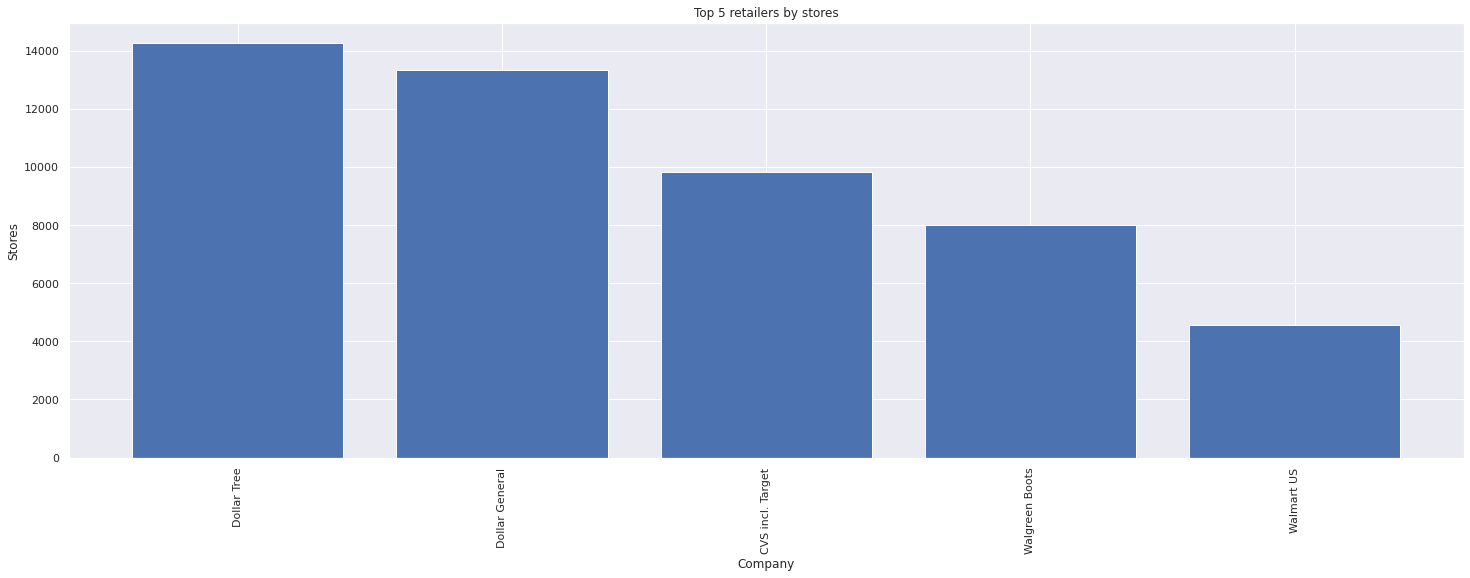

In [23]:
plt.bar(w, z)
plt.title('Top 5 retailers by stores')
plt.xlabel('Company')
plt.ylabel('Stores')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

Las compañías con más tiendas físicas son **Dollar Tree, Dollar General, Target, Walgreen Boots y Walmart US** sin embargo, solamente **las dos últimas también se encuentran en el top 5 de las más vendedoras**, de acuerdo con el análisis de la **pregunta cero**.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [24]:
df_grouped_by_category = df.groupby(['Category'])['Sales'].sum()
df_grouped_by_category = df_grouped_by_category.sort_values(ascending=False)
df_grouped_by_category

Category
Supercenters             745919
Grocery                  297164
Drug Stores              184202
Home Improvement         144287
Warehouse Club            90048
Electronic/Mail Order     71687
Warehouse Clubs           56828
Department Stores         45088
Dollar Stores             43698
Electronics               34980
Apparel                   25012
Name: Sales, dtype: int64

In [25]:
df_grouped_by_category.sum() 

1738913

<AxesSubplot:ylabel='Sales'>

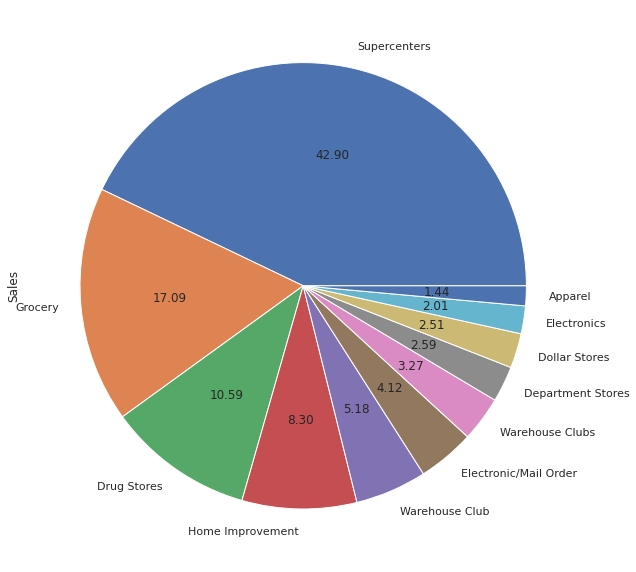

In [26]:
df_grouped_by_category.plot.pie(figsize=(10,20), autopct="%.2f")

Como podemos observar en la gráfica del pastel, la categoría que tiene más ventas es **Supercenters** con **745919 millones USD** y un **42.90%** de participación en el market share.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [27]:
df_sorted['Sales/Avg. Store fixed'] = df_sorted['Sales'] / df['Stores']
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Avg. Store fixed
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,24.432072


Cabe mencionar que es necesario generar una nueva columna __Sales/Avg. Store fixed__ como la relación entre la cantidad de ventas y la cantidad de tiendas por compañía.


In [28]:
df_sorted_two = df_sorted.sort_values('Sales/Avg. Store fixed', ascending=0)
df_sorted_two

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Avg. Store fixed
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840
21,HEB,21384,323.0,66.825000,0.018927,Grocery,66.204334
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
15,Ahold,26903,794.0,34.446863,0.033854,Grocery,33.882872
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,29.277840


<AxesSubplot:ylabel='Company'>

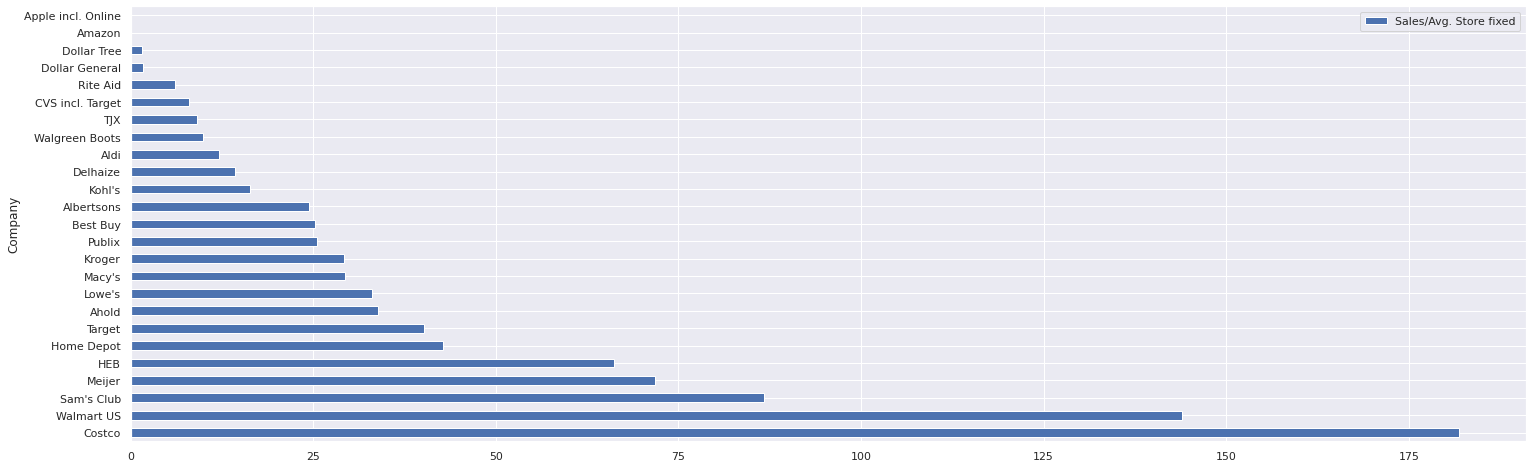

In [29]:
df_sorted_two.plot.barh(x='Company', y='Sales/Avg. Store fixed')

Podemos ver que si tenemos en cuenta la anterior relación, la compañía que genera más ventas por tiendas físicas es **Costco** con un índice de **181.91 millones USD/tienda**

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

El siguiente análisis solamente está basado en la información proporcionada en esta fuente de datos. Por lo tanto, asumiremos que las compañías que venden de forma exclusivamente online son aquellas que no tienen tiendas físicas reportadas, en este caso, **Amazon y Apple**.

In [30]:
df_filter_exclusive_online = df['Stores'].isna()
df_filter_exclusive_online

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Stores, dtype: bool

In [31]:
df_filter_with_stores = df['Stores'].notna()
df_filter_with_stores

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
Name: Stores, dtype: bool

In [32]:
df_sorted['Sales'][df_filter_exclusive_online].sum()

109351

In [33]:
df_sorted['Sales'][df_filter_with_stores].sum()

1667226

In [34]:
df_sorted['Sales'][df_filter_with_stores].sum() - df_sorted['Sales'][df_filter_exclusive_online].sum()

1557875

In [35]:
df_sorted['Sales'].sum() 

1776577

In [36]:
df_sorted['Sales'][df_filter_exclusive_online].sum() / df_sorted['Sales'].sum() * 100

6.155151169918332

In [37]:
df_sorted['Sales'][df_filter_with_stores].sum() / df_sorted['Sales'].sum() * 100

93.84484883008167

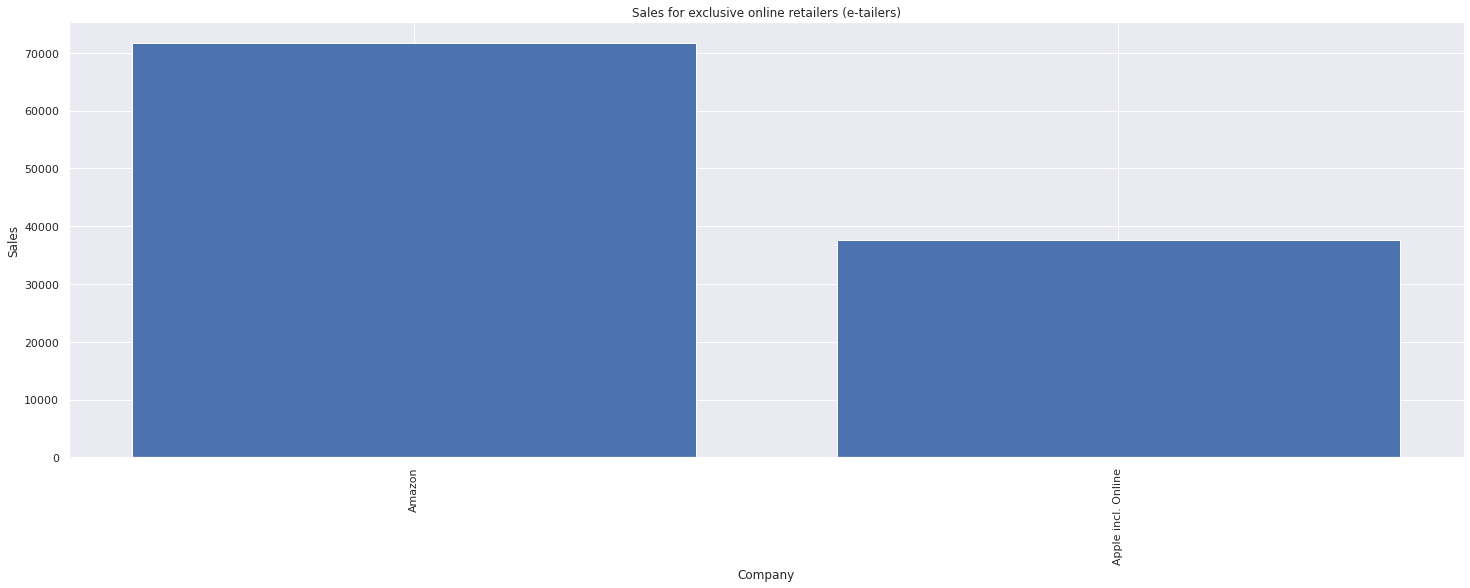

In [38]:
x = df_sorted['Company'][df_filter_exclusive_online] 
y = df_sorted['Sales'][df_filter_exclusive_online]

plt.bar(x, y)
plt.title('Sales for exclusive online retailers (e-tailers)')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

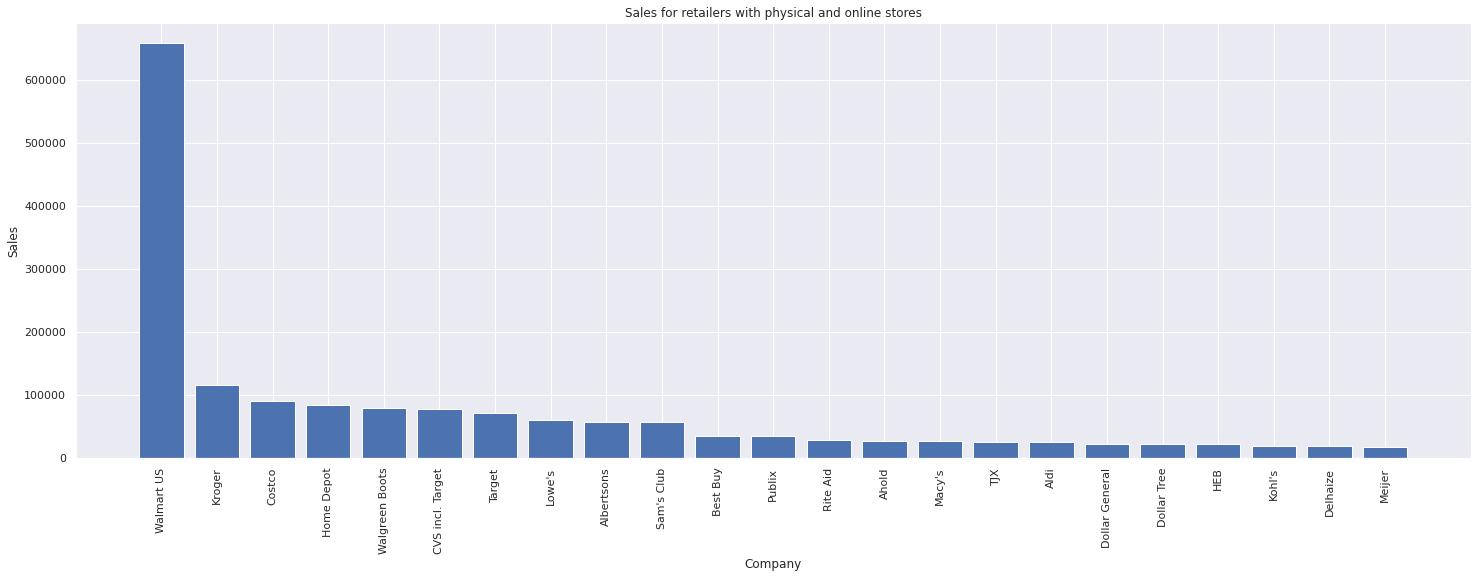

In [39]:
x = df_sorted['Company'][df_filter_with_stores]
y = df_sorted['Sales'][df_filter_with_stores]

plt.bar(x, y)
plt.title('Sales for retailers with physical and online stores')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

In [40]:
custom_dict = {}
for index, row in df_sorted.iterrows():
  if pd.isna(row['Stores']):
      custom_dict[row['Company']] = True
  else:
      custom_dict[row['Company']] = False

custom_dict

{'Walmart US': False,
 'Kroger': False,
 'Costco': False,
 'Home Depot': False,
 'Walgreen Boots': False,
 'CVS incl. Target': False,
 'Amazon': True,
 'Target': False,
 "Lowe's": False,
 'Albertsons': False,
 "Sam's Club": False,
 'Apple incl. Online': True,
 'Best Buy': False,
 'Publix': False,
 'Rite Aid': False,
 'Ahold': False,
 "Macy's": False,
 'TJX': False,
 'Aldi': False,
 'Dollar General': False,
 'Dollar Tree': False,
 'HEB': False,
 "Kohl's": False,
 'Delhaize': False,
 'Meijer': False}

In [41]:
df_sorted['Exclusively Online'] = df_sorted['Company'].map(custom_dict)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Avg. Store fixed,Exclusively Online
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597,False
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055,False
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152,False
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878,False
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034,False
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443,False
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN,True
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102,False
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888,False
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,24.432072,False


In [42]:
df_sorted_grouped_by_exclusively_online = df_sorted.groupby(['Exclusively Online'])['Sales'].sum()
df_sorted_grouped_by_exclusively_online

Exclusively Online
False    1667226
True      109351
Name: Sales, dtype: int64

In [43]:
df_sorted_grouped_by_exclusively_online.sum()

1776577

<AxesSubplot:ylabel='Sales'>

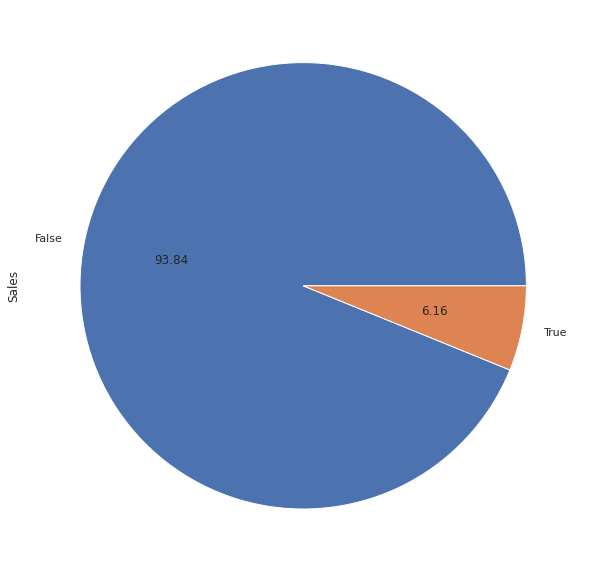

In [44]:
df_sorted_grouped_by_exclusively_online.plot.pie(figsize=(10,20), autopct="%.2f")

Podemos observar de acuerdo a las últimas dos gráficas de barras anteriores que **Amazon como e-tailer, a pesar que supera ampliamente en ventas a su competidor Apple, no destaca en este rubro más que otros retailers que cuentan con tiendas físicas y online como Walmart, Kroger, Costco, Home Depot, Walgreen Boots y CVS**. También podemos ver que el total de ventas de los retailers con tiendas físicas superan por una diferencia de **1557875 millones USD** con un **93.84% del market share** a los e-tailers que funcionan exclusivamente online.

## III. Tus propias preguntas

### 10. ¿Cuáles son las estadísticas descriptivas más importantes de tendencia central, dispersión y distribución que podemos encontrar en esta fuente de datos sobre retailers?

In [45]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 25 non-null     object 
 1   Sales                   25 non-null     int64  
 2   Stores                  23 non-null     float64
 3   Sales/Avg. Store        23 non-null     float64
 4   Store Count Growth      23 non-null     float64
 5   Category                24 non-null     object 
 6   Sales/Avg. Store fixed  23 non-null     float64
 7   Exclusively Online      25 non-null     bool   
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 1.6+ KB


In [46]:
df_sorted.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth,Sales/Avg. Store fixed
count,25.000000,23.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230,39.679958
std,125405.727644,4038.708714,40.625277,0.068552,45.135860
min,16592.000000,231.000000,1.563919,-0.059515,1.506246
25%,24402.000000,1029.000000,11.263462,-0.001860,10.968627
50%,34980.000000,1828.000000,25.997733,0.019520,25.468542
75%,71687.000000,4242.000000,41.358955,0.078934,41.460490
max,658119.000000,14250.000000,187.795620,0.255662,181.915152


In [47]:
# Quartiles para las ventas
median = df_sorted['Sales'].median()
Q1 = df_sorted['Sales'].quantile(q=0.25)
Q3 = df_sorted['Sales'].quantile(q=0.75)
min_val = df_sorted['Sales'].quantile(q=0)
max_val = df_sorted['Sales'].quantile(q=1.0)
print(min_val, Q1, median, Q3, max_val)

16592.0 24402.0 34980.0 71687.0 658119.0


In [48]:
iqr = Q3 - Q1
iqr

47285.0

In [49]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -46525.5, 142614.5


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales'>

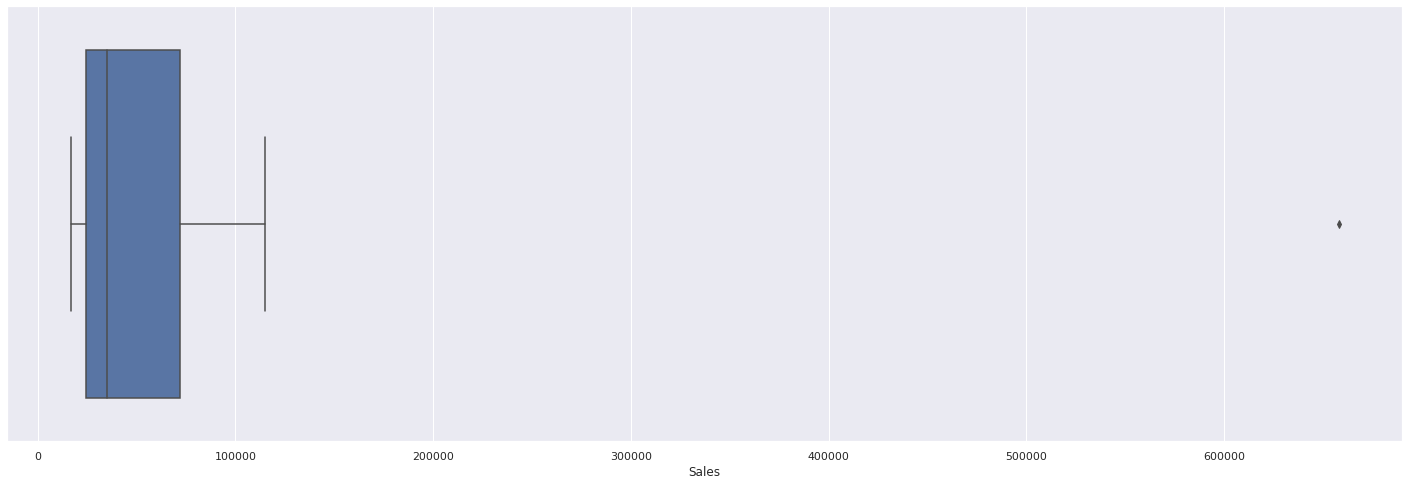

In [50]:
sns.boxplot(df_sorted['Sales'])

### 11. ¿Cuál es la categoría que tiene más tiendas físicas?

In [51]:
df_grouped_by_category = df.groupby(['Category'])['Stores'].sum()
df_grouped_by_category = df_grouped_by_category.sort_values(ascending=False)
df_grouped_by_category

Category
Dollar Stores            27600.0
Drug Stores              22368.0
Grocery                  12026.0
Supercenters              6577.0
Home Improvement          3793.0
Apparel                   2770.0
Department Stores         2058.0
Electronics               1389.0
Warehouse Clubs            655.0
Warehouse Club             495.0
Electronic/Mail Order        0.0
Name: Stores, dtype: float64

In [52]:
df_grouped_by_category.sum() 

79731.0

<AxesSubplot:ylabel='Stores'>

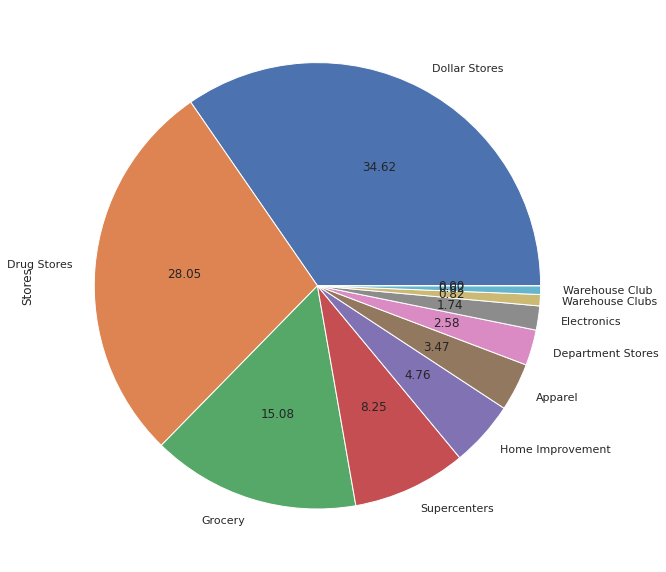

In [53]:
df_grouped_by_category.plot.pie(figsize=(10,20), autopct="%.2f")

Podemos ver que la categoría con más cantidad de tiendas físicas entre los retailers es **Dollar Stores** con **27600 tiendas** y una participación del **34.62%**

### 12. ¿Cómo está el crecimiento del conteo de tiendas?

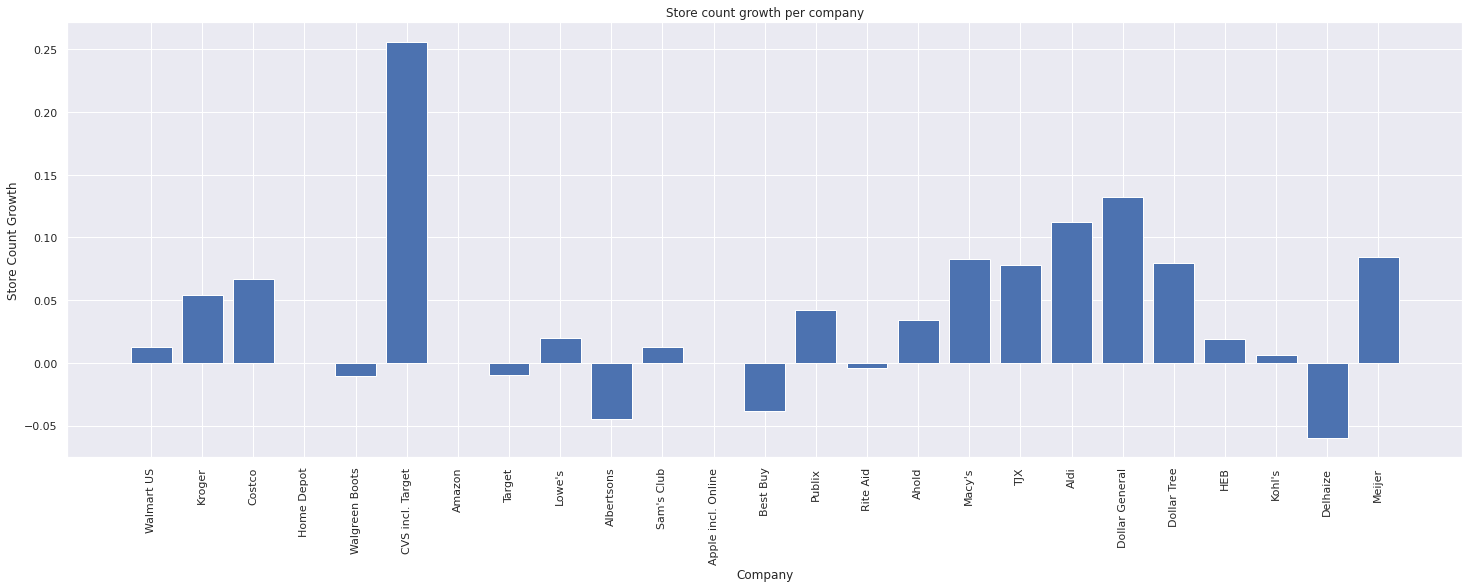

In [54]:
x1 = df['Company'][:] 
y1 = df['Store Count Growth'][:]

plt.bar(x1, y1)
plt.title('Store count growth per company')
plt.xlabel('Company')
plt.ylabel('Store Count Growth')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

Claramente podemos observar que la compañía **CVS es la que tuvo más crecimiento en el número de tiendas físicas** con respecto al periodo anterior, por otro lado, otras compañías como **Home Depot, Amazon y Apple no presentan variación en este aspecto**, y  otros retailers como **Walgreen Boots, Target, Albertsons, Best Buy y Delhaize presentaron una variación negativa siendo en este último la mayor**.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f1b942b-d8d4-4802-af6d-08e680748997' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>